In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.chdir("/content/gdrive/My Drive/Pesquisa/1 Artigos em desenvolvimento/2025_11_swc_heatwave_detection_vs_NBR15575/1 Desenvolvimento - Old/sim_outputs")
filelist = os.listdir()

In [4]:
filelist

['U001_Caso1_1a7_ac_833780_MY.1991.csv',
 'U001_Caso1_1a7_ac_833780_MY.1992.csv',
 'U001_Caso1_1a7_ac_833780_MY.1993.csv',
 'U001_Caso1_1a7_ac_833780_MY.1994.csv',
 'U001_Caso1_1a7_ac_833780_MY.1995.csv',
 'U001_Caso1_1a7_ac_833780_MY.1996.csv',
 'U001_Caso1_1a7_ac_833780_MY.1997.csv',
 'U001_Caso1_1a7_ac_833780_MY.1998.csv',
 'U001_Caso1_1a7_ac_833780_MY.1999.csv',
 'U001_Caso1_1a7_ac_833780_MY.2000.csv',
 'U001_Caso1_1a7_ac_833780_MY.2001.csv',
 'U001_Caso1_1a7_ac_833780_MY.2003.csv',
 'U001_Caso1_1a7_ac_833780_MY.2002.csv',
 'U001_Caso1_1a7_ac_833780_MY.2004.csv',
 'U001_Caso1_1a7_ac_833780_MY.2005.csv',
 'U001_Caso1_1a7_ac_833780_MY.2006.csv',
 'U001_Caso1_1a7_ac_833780_MY.2007.csv',
 'U001_Caso1_1a7_ac_833780_MY.2008.csv',
 'U001_Caso1_1a7_ac_833780_MY.2009.csv',
 'U001_Caso1_1a7_ac_833780_MY.2011.csv',
 'U001_Caso1_1a7_ac_833780_MY.2010.csv',
 'U001_Caso1_1a7_ac_833780_MY.2012.csv',
 'U001_Caso1_1a7_ac_833780_MY.2013.csv',
 'U001_Caso1_1a7_ac_833780_MY.2014.csv',
 'U001_Caso1_1a7

In [5]:
# Inicializa listas para os DataFrames
dfs_vn = []
dfs_ac = []

In [6]:
# Processa cada arquivo
for arquivo in filelist:
    if "_vn_833780" in arquivo:
        df = pd.read_csv(arquivo)
        df['ano'] = os.path.basename(arquivo).split('.')[-2]  # extrai ano do nome
        dfs_vn.append(df)
    elif "_ac_833780" in arquivo:
        df = pd.read_csv(arquivo)
        df['ano'] = os.path.basename(arquivo).split('.')[-2]
        dfs_ac.append(df)

In [7]:
# Junta os DataFrames
df_vn_total = pd.concat(dfs_vn, ignore_index=True)
df_ac_total = pd.concat(dfs_ac, ignore_index=True)

In [8]:
# Exibe os shapes finais como confirmação
print(f"DataFrame VN: {df_vn_total.shape}")
print(f"DataFrame AC: {df_ac_total.shape}")

DataFrame VN: (289080, 28)
DataFrame AC: (289080, 14)


In [9]:
#df_vn_total.to_csv('U001_Caso1_1a7_vn_total.csv', index=False)
#df_ac_total.to_csv('U001_Caso1_1a7_ac_total.csv', index=False)

In [10]:
df_ac_total

Date/Time  \
0        01/01  01:00:00   
1        01/01  02:00:00   
2        01/01  03:00:00   
3        01/01  04:00:00   
4        01/01  05:00:00   
...                  ...   
289075   12/31  20:00:00   
289076   12/31  21:00:00   
289077   12/31  22:00:00   
289078   12/31  23:00:00   
289079   12/31  24:00:00   

        DORM1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)  \
0                                                     0.0                                     
1                                                     0.0                                     
2                                                     0.0                                     
3                                                     0.0                                     
4                                                     0.0                                     
...                                                   ...                                     
289075                                                0.0                                     
289076                                                0.0                                     
289077                                                0.0                                     
289078                                                0.0                                     
289079                                                0.0                                     

        DORM1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Energy [J](Hourly)  \
0                                            1.083322e+06                                     
1                                            9.461263e+05                                     
2                                            8.272076e+05                                     
3                                            7.160230e+05                                     
4                                            6.115421e+05                                     
...                                                   ...                                     
289075                                       0.000000e+00                                     
289076                                       0.000000e+00                                     
289077                                       0.000000e+00                                     
289078                                       2.114054e+06                                     
289079                                       1.897527e+06                                     

        DORM1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Rate [W](Hourly)  \
0                                                     0.0                                   
1                                                     0.0                                   
2                                                     0.0                                   
3                                                     0.0                                   
4                                                     0.0                                   
...                                                   ...                                   
289075                                                0.0                                   
289076                                                0.0                                   
289077                                                0.0                                   
289078                                                0.0                                   
289079                                                0.0                                   

        DORM1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](Hourly)  \
0                                              300.922817                                   
1                                              262.812868                                   


# Análise da sincronia entre ToMax e métodos de detecção

In [11]:
# Normaliza espaços e remove espaços extras
df_vn_total['Date/Time'] = df_vn_total['Date/Time'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [12]:
# Concatena ano com data/hora no formato correto
datetime_str = df_vn_total['ano'].astype(str) + '/' + df_vn_total['Date/Time']

In [13]:
# Converte para datetime
df_vn_total['timeset'] = pd.to_datetime(datetime_str, format="%Y/%m/%d %H:%M:%S", errors='coerce')

In [14]:
df_hw = pd.read_csv("../data/merged_heatwaves.csv", low_memory=False)

In [15]:
# Garantir que os timestamps estejam no formato correto
df_hw['timeset'] = pd.to_datetime(df_hw['timeset'])

In [16]:
# Merge com os dados de ondas de calor
df_merged = pd.merge(
    df_vn_total,
    df_hw[['timeset', 'Dry Bulb Temperature', 'INMET Alert', 'Ouzeau Detected']],
    on='timeset',
    how='left'
)

In [17]:
df_merged

Date/Time  SALA:Zone Mean Air Temperature [C](Hourly)  \
0       01/01 01:00:00                                   23.577204   
1       01/01 02:00:00                                   22.305801   
2       01/01 03:00:00                                   22.064590   
3       01/01 04:00:00                                   21.738830   
4       01/01 05:00:00                                   21.104281   
...                ...                                         ...   
289075  12/31 20:00:00                                   28.202071   
289076  12/31 21:00:00                                   28.180620   
289077  12/31 22:00:00                                   28.068402   
289078  12/31 23:00:00                                   28.070026   
289079  12/31 24:00:00                                   27.642734   

        SALA:Zone Operative Temperature [C](Hourly)  \
0                                         24.511336   
1                                         23.581037   
2                                         23.201277   
3                                         22.809194   
4                                         22.263207   
...                                             ...   
289075                                    29.283370   
289076                                    29.015231   
289077                                    28.746222   
289078                                    28.510037   
289079                                    28.075794   

        DORM1:Zone Mean Air Temperature [C](Hourly)  \
0                                         24.375590   
1                                         23.232173   
2                                         22.933194   
3                                         22.627453   
4                                         21.935736   
...                                             ...   
289075                                    28.759556   
289076                                    28.423780   
289077                                    28.403210   
289078                                    27.517197   
289079                                    27.226353   

        DORM1:Zone Operative Temperature [C](Hourly)  \
0                                          24.859694   
1                                          24.046201   
2                                          23.661915   
3                                          23.295190   
4                                          22.733264   
...                                              ...   
289075                                     29.012669   
289076                                     28.686545   
289077                                     28.528196   
289078                                     27.931516   
289079                                     27.622099   

        DORM2:Zone Mean Air Temperature [C](Hourly)  \
0                                         22.112845   
1                                         20.812322   
2                                         20.728911   
3                                         20.410034   
4                                         19.836900   
...                                             ...   
289075                                    28.729191   
289076                                    28.379509   
289077                                    28.335892   
289078                                    27.407595   
289079                                    26.930950   

        DORM2:Zone Operative Temperature [C](Hourly)  \
0                                          23.581401   
1                                          22.632756   
2                                          22.337400   
3                                          21.953241   
4                                          21.441187   
...                                              ...   
289075                                     28.963325   
289076                                     28.618190   
289077      

In [18]:
# Extrair hora do timestamp
df_merged['hora'] = df_merged['timeset'].dt.hour

In [19]:
# Filtrar dataframe para horários ocupados
mask_sala = df_merged['hora'].between(15, 22)
df_merged_sala = df_merged.loc[mask_sala]



In [20]:
mask_dorm = (df_merged['hora'] >= 23) | (df_merged['hora'] <= 8)
for dorm in ['DORM1', 'DORM2']:
    df_merged_dorm = df_merged.loc[mask_dorm]

In [21]:
resultados = []

In [22]:
col_temp = f'SALA:Zone Operative Temperature [C](Hourly)'

# Identifica o índice do valor máximo por ano
maximos_anuais = df_merged_sala.groupby('ano')[col_temp].idxmax()

for idx in maximos_anuais:
    row = df_merged_sala.loc[idx]
    resultados.append({
        'Ano': row['ano'],
        'Ambiente': 'SALA',
        'Temp Max (°C)': row[col_temp],
        'Durante Onda de Calor INMET': pd.notna(row['INMET Alert']) and row['INMET Alert'] != '',
        'Durante Onda de Calor Ouzeau': row['Ouzeau Detected'] == 1
    })

In [23]:
# Lista de dormitórios a verificar
ambientes = ['DORM1', 'DORM2']

In [24]:
for ambiente in ambientes:
    col_temp = f'{ambiente}:Zone Operative Temperature [C](Hourly)'

    # Identifica o índice do valor máximo por ano
    maximos_anuais = df_merged_dorm.groupby('ano')[col_temp].idxmax()

    for idx in maximos_anuais:
        row = df_merged_dorm.loc[idx]
        resultados.append({
            'Ano': row['ano'],
            'Ambiente': ambiente,
            'Temp Max (°C)': row[col_temp],
            'Durante Onda de Calor INMET': pd.notna(row['INMET Alert']) and row['INMET Alert'] != '',
            'Durante Onda de Calor Ouzeau': row['Ouzeau Detected'] == 1
        })

In [25]:
# Resultado final
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Ano Ambiente  Temp Max (°C)  Durante Onda de Calor INMET  \
0   1991     SALA      33.858066                        False   
1   1992     SALA      32.304244                        False   
2   1993     SALA      34.888171                         True   
3   1994     SALA      36.060688                         True   
4   1995     SALA      34.233676                        False   
..   ...      ...            ...                          ...   
94  2019    DORM2      32.017358                        False   
95  2020    DORM2      33.217964                         True   
96  2021    DORM2      31.971133                         True   
97  2022    DORM2      30.468691                        False   
98  2023    DORM2      32.623979                         True   

    Durante Onda de Calor Ouzeau  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  
..       

In [26]:
# Mapear booleanos para strings para visualização
df_resultados['INMET'] = df_resultados['Durante Onda de Calor INMET'].map({True: 'Sim', False: 'Não'})
df_resultados['Ouzeau'] = df_resultados['Durante Onda de Calor Ouzeau'].map({True: 'Sim', False: 'Não'})


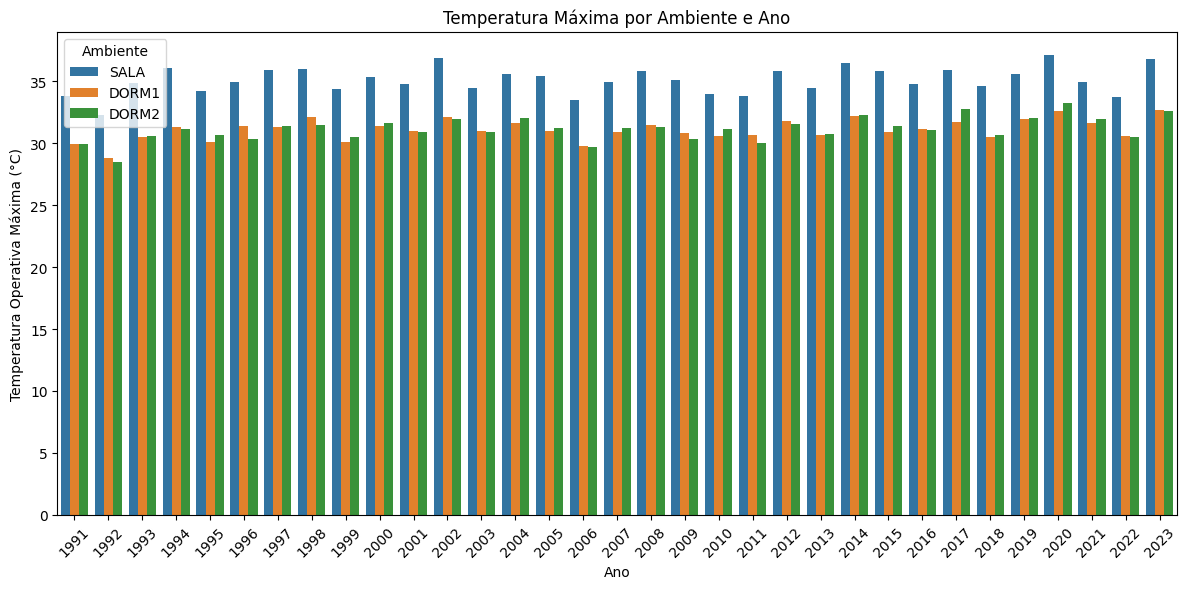

In [27]:
# Gráfico 1: Temperatura máxima por ambiente e ano
plt.figure(figsize=(12, 6))
sns.barplot(data=df_resultados, x='Ano', y='Temp Max (°C)', hue='Ambiente')
plt.title('Temperatura Máxima por Ambiente e Ano')
plt.ylabel('Temperatura Operativa Máxima (°C)')
plt.xticks(rotation=45)
plt.legend(title='Ambiente')
plt.tight_layout()
plt.show()

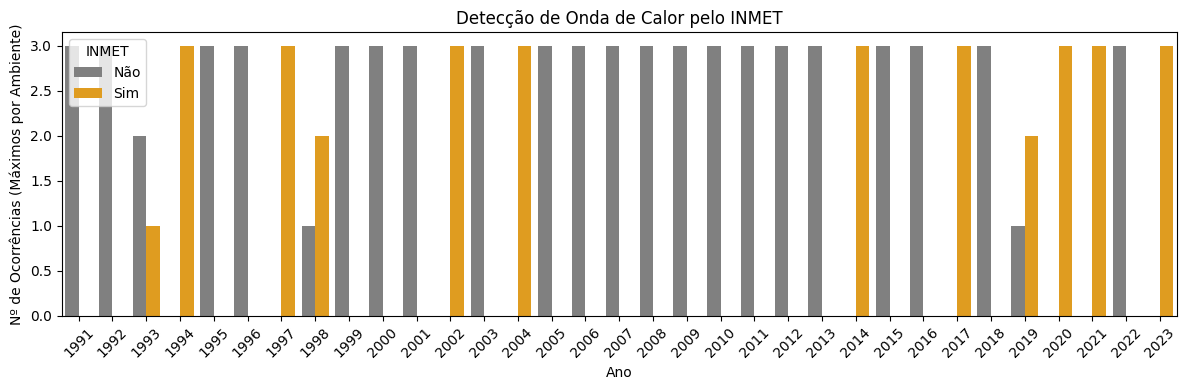

In [28]:
# Gráfico 2: Contagem de máximos detectados como onda de calor - INMET
plt.figure(figsize=(12, 4))
sns.countplot(data=df_resultados, x='Ano', hue='INMET', palette={'Sim': 'orange', 'Não': 'gray'})
plt.title('Detecção de Onda de Calor pelo INMET')
plt.ylabel('Nº de Ocorrências (Máximos por Ambiente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

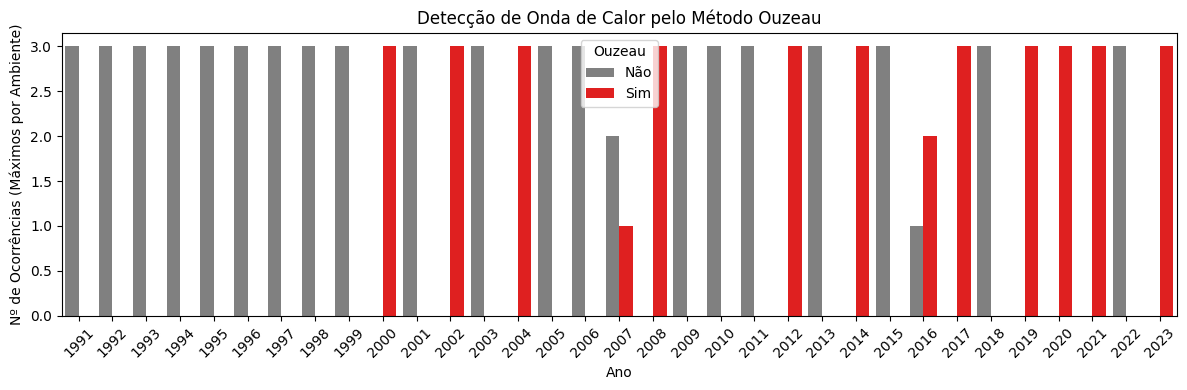

In [29]:
# Gráfico 3: Contagem de máximos detectados como onda de calor - Ouzeau
plt.figure(figsize=(12, 4))
sns.countplot(data=df_resultados, x='Ano', hue='Ouzeau', palette={'Sim': 'red', 'Não': 'gray'})
plt.title('Detecção de Onda de Calor pelo Método Ouzeau')
plt.ylabel('Nº de Ocorrências (Máximos por Ambiente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Cálculo de sincronia: % de anos com pico durante onda de calor
sincronia = df_resultados.groupby('Ambiente').agg({
    'Durante Onda de Calor INMET': 'mean',
    'Durante Onda de Calor Ouzeau': 'mean'
}).reset_index()

# Renomeia colunas para melhor leitura
sincronia.columns = ['Ambiente', 'Sincronia INMET (%)', 'Sincronia Ouzeau (%)']
sincronia['Sincronia INMET (%)'] *= 100
sincronia['Sincronia Ouzeau (%)'] *= 100

print(sincronia)

  Ambiente  Sincronia INMET (%)  Sincronia Ouzeau (%)
0    DORM1            33.333333             39.393939
1    DORM2            27.272727             33.333333
2     SALA            36.363636             36.363636


In [31]:
#sincronia.to_csv('sincronia.csv', index=False)

In [32]:
# Dormitórios a analisar
ambientes = ['DORM1', 'DORM2']
picos_absolutos = []

for ambiente in ambientes:
    col = f'{ambiente}:Zone Operative Temperature [C](Hourly)'

    # Índice do maior valor absoluto da série
    idx_max = df_merged_dorm[col].idxmax()
    row = df_merged_dorm.loc[idx_max]

    picos_absolutos.append({
        'Ambiente': ambiente,
        'Temperatura Máxima (°C)': row[col],
        'Data/Hora': row['timeset'],
        'Durante Onda de Calor INMET': pd.notna(row.get('INMET Alert')) and row['INMET Alert'] != '',
        'Durante Onda de Calor Ouzeau': row.get('Ouzeau Detected') == 1
    })


col = f'SALA:Zone Operative Temperature [C](Hourly)'

# Índice do maior valor absoluto da série
idx_max = df_merged_sala[col].idxmax()
row = df_merged_sala.loc[idx_max]

picos_absolutos.append({
    'Ambiente': 'SALA',
    'Temperatura Máxima (°C)': row[col],
    'Data/Hora': row['timeset'],
    'Durante Onda de Calor INMET': pd.notna(row.get('INMET Alert')) and row['INMET Alert'] != '',
    'Durante Onda de Calor Ouzeau': row.get('Ouzeau Detected') == 1
})

# Resultado em DataFrame
df_picos_absolutos = pd.DataFrame(picos_absolutos)
print(df_picos_absolutos)


  Ambiente  Temperatura Máxima (°C)           Data/Hora  \
0    DORM1                32.704021 2023-11-15 23:00:00   
1    DORM2                33.217964 2020-10-08 23:00:00   
2     SALA                37.145337 2020-10-08 18:00:00   

   Durante Onda de Calor INMET  Durante Onda de Calor Ouzeau  
0                         True                          True  
1                         True                          True  
2                         True                          True  


In [33]:
#df_picos_absolutos.to_csv('picos_absolutos.csv', index=False)

In [34]:
percentil = 95
ambientes = ['DORM1', 'DORM2']
extremos_stats = []

for ambiente in ambientes:
    col = f'{ambiente}:Zone Operative Temperature [C](Hourly)'
    limiar = df_merged_dorm[col].quantile(percentil / 100)

    extremos = df_merged_dorm[df_merged_dorm[col] > limiar]
    total = len(extremos)

    inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
    ouzeau = extremos['Ouzeau Detected'] == 1

    extremos_stats.append({
        'Ambiente': ambiente,
        f'Percentil P{percentil} (°C)': round(limiar, 2),
        f'Nº valores > P{percentil}': total,
        'Coincide com Onda de Calor (INMET)': inmet.sum(),
        'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
        'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
        'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
    })

col = f'SALA:Zone Operative Temperature [C](Hourly)'
limiar = df_merged_sala[col].quantile(percentil / 100)

extremos = df_merged_sala[df_merged_sala[col] > limiar]
total = len(extremos)

inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
ouzeau = extremos['Ouzeau Detected'] == 1

extremos_stats.append({
    'Ambiente': 'SALA',
    f'Percentil P{percentil} (°C)': round(limiar, 2),
    f'Nº valores > P{percentil}': total,
    'Coincide com Onda de Calor (INMET)': inmet.sum(),
    'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
    'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
    'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
})


df_extremos = pd.DataFrame(extremos_stats)
print(df_extremos)

  Ambiente  Percentil P95 (°C)  Nº valores > P95  \
0    DORM1               27.76              5421   
1    DORM2               27.82              5421   
2     SALA               32.44              4818   

   Coincide com Onda de Calor (INMET)  Coincide com Onda de Calor (Ouzeau)  \
0                                 303                                  801   
1                                 312                                  809   
2                                 453                                 1028   

   Proporção com INMET (%)  Proporção com Ouzeau (%)  
0                 5.589375                 14.775872  
1                 5.755396                 14.923446  
2                 9.402242                 21.336654  


In [35]:
#df_extremos.to_csv('extremos_tempP95.csv', index=False)

In [36]:
percentil = 99
ambientes = ['DORM1', 'DORM2']
extremos_stats = []

for ambiente in ambientes:
    col = f'{ambiente}:Zone Operative Temperature [C](Hourly)'
    limiar = df_merged_dorm[col].quantile(percentil / 100)

    extremos = df_merged_dorm[df_merged_dorm[col] > limiar]
    total = len(extremos)

    inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
    ouzeau = extremos['Ouzeau Detected'] == 1

    extremos_stats.append({
        'Ambiente': ambiente,
        f'Percentil P{percentil} (°C)': round(limiar, 2),
        f'Nº valores > P{percentil}': total,
        'Coincide com Onda de Calor (INMET)': inmet.sum(),
        'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
        'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
        'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
    })

col = f'SALA:Zone Operative Temperature [C](Hourly)'
limiar = df_merged_sala[col].quantile(percentil / 100)

extremos = df_merged_sala[df_merged_sala[col] > limiar]
total = len(extremos)

inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
ouzeau = extremos['Ouzeau Detected'] == 1

extremos_stats.append({
    'Ambiente': 'SALA',
    f'Percentil P{percentil} (°C)': round(limiar, 2),
    f'Nº valores > P{percentil}': total,
    'Coincide com Onda de Calor (INMET)': inmet.sum(),
    'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
    'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
    'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
})


df_extremos = pd.DataFrame(extremos_stats)
print(df_extremos)

  Ambiente  Percentil P99 (°C)  Nº valores > P99  \
0    DORM1               29.31              1085   
1    DORM2               29.39              1085   
2     SALA               33.95               964   

   Coincide com Onda de Calor (INMET)  Coincide com Onda de Calor (Ouzeau)  \
0                                 133                                  308   
1                                 143                                  332   
2                                 273                                  450   

   Proporção com INMET (%)  Proporção com Ouzeau (%)  
0                12.258065                 28.387097  
1                13.179724                 30.599078  
2                28.319502                 46.680498  


In [37]:
#df_extremos.to_csv('extremos_tempP99.csv', index=False)

# Efeitos da umidade (Heat index)

In [38]:
resultados_HI = []

In [39]:
col_temp = f'SALA:Zone Heat Index [C](Hourly)'

# Identifica o índice do valor máximo por ano
maximos_anuais = df_merged_sala.groupby('ano')[col_temp].idxmax()

for idx in maximos_anuais:
    row = df_merged_sala.loc[idx]
    resultados_HI.append({
        'Ano': row['ano'],
        'Ambiente': 'SALA',
        'HI Max (°C)': row[col_temp],
        'Durante Onda de Calor INMET': pd.notna(row['INMET Alert']) and row['INMET Alert'] != '',
        'Durante Onda de Calor Ouzeau': row['Ouzeau Detected'] == 1
    })

In [40]:
# Lista de dormitórios a verificar
ambientes = ['DORM1', 'DORM2']

In [41]:
for ambiente in ambientes:
    col_temp = f'{ambiente}:Zone Heat Index [C](Hourly)'

    # Identifica o índice do valor máximo por ano
    maximos_anuais = df_merged_dorm.groupby('ano')[col_temp].idxmax()

    for idx in maximos_anuais:
        row = df_merged_dorm.loc[idx]
        resultados_HI.append({
            'Ano': row['ano'],
            'Ambiente': ambiente,
            'HI Max (°C)': row[col_temp],
            'Durante Onda de Calor INMET': pd.notna(row['INMET Alert']) and row['INMET Alert'] != '',
            'Durante Onda de Calor Ouzeau': row['Ouzeau Detected'] == 1
        })

In [42]:
# Resultado final
df_resultados_HI = pd.DataFrame(resultados_HI)
print(df_resultados_HI)

     Ano Ambiente  HI Max (°C)  Durante Onda de Calor INMET  \
0   1991     SALA    37.356940                        False   
1   1992     SALA    34.353546                        False   
2   1993     SALA    38.466578                        False   
3   1994     SALA    40.250560                        False   
4   1995     SALA    35.792763                        False   
..   ...      ...          ...                          ...   
94  2019    DORM2    32.001344                         True   
95  2020    DORM2    32.650822                        False   
96  2021    DORM2    30.861793                        False   
97  2022    DORM2    31.141643                        False   
98  2023    DORM2    32.264508                        False   

    Durante Onda de Calor Ouzeau  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  
..                           ... 

In [43]:
# Cálculo de sincronia: % de anos com pico durante onda de calor
sincronia = df_resultados_HI.groupby('Ambiente').agg({
    'Durante Onda de Calor INMET': 'mean',
    'Durante Onda de Calor Ouzeau': 'mean'
}).reset_index()

# Renomeia colunas para melhor leitura
sincronia.columns = ['Ambiente', 'Sincronia INMET (%)', 'Sincronia Ouzeau (%)']
sincronia['Sincronia INMET (%)'] *= 100
sincronia['Sincronia Ouzeau (%)'] *= 100

print(sincronia)

  Ambiente  Sincronia INMET (%)  Sincronia Ouzeau (%)
0    DORM1             6.060606             15.151515
1    DORM2             9.090909             12.121212
2     SALA             9.090909              9.090909


In [44]:
percentil = 99
ambientes = ['DORM1', 'DORM2']
extremos_stats_HI = []

for ambiente in ambientes:
    col = f'{ambiente}:Zone Heat Index [C](Hourly)'
    limiar = df_merged_dorm[col].quantile(percentil / 100)

    extremos = df_merged_dorm[df_merged_dorm[col] > limiar]
    total = len(extremos)

    inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
    ouzeau = extremos['Ouzeau Detected'] == 1

    extremos_stats_HI.append({
        'Ambiente': ambiente,
        f'Percentil P{percentil} (°C)': round(limiar, 2),
        f'Nº valores > P{percentil}': total,
        'Coincide com Onda de Calor (INMET)': inmet.sum(),
        'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
        'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
        'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
    })

col = f'SALA:Zone Heat Index [C](Hourly)'
limiar = df_merged_sala[col].quantile(percentil / 100)

extremos = df_merged_sala[df_merged_sala[col] > limiar]
total = len(extremos)

inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
ouzeau = extremos['Ouzeau Detected'] == 1

extremos_stats_HI.append({
    'Ambiente': 'SALA',
    f'Percentil P{percentil} (°C)': round(limiar, 2),
    f'Nº valores > P{percentil}': total,
    'Coincide com Onda de Calor (INMET)': inmet.sum(),
    'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
    'Proporção com INMET (%)': 100 * inmet.sum() / total if total else 0,
    'Proporção com Ouzeau (%)': 100 * ouzeau.sum() / total if total else 0
})


df_extremos_HI = pd.DataFrame(extremos_stats_HI)
print(df_extremos_HI)

  Ambiente  Percentil P99 (°C)  Nº valores > P99  \
0    DORM1               29.23              1085   
1    DORM2               29.32              1085   
2     SALA               34.09               964   

   Coincide com Onda de Calor (INMET)  Coincide com Onda de Calor (Ouzeau)  \
0                                  83                                  163   
1                                  94                                  177   
2                                 107                                  123   

   Proporção com INMET (%)  Proporção com Ouzeau (%)  
0                 7.649770                 15.023041  
1                 8.663594                 16.313364  
2                11.099585                 12.759336  


In [45]:
#df_extremos_HI.to_csv('extremos_hiP99.csv', index=False)

In [46]:
for dorm in ['DORM1', 'DORM2']:
    hi_col = f'{dorm}:Zone Heat Index [C](Hourly)'
    thr = df_merged_dorm[hi_col].quantile(0.99)
    extremos = df_merged_dorm[df_merged_dorm[hi_col] > thr]
    dist_horas = extremos['hora'].value_counts(normalize=True).sort_index() * 100

    print(f'\nDistribuição horária dos extremos de HI - {dorm}')
    print(dist_horas.round(1))


Distribuição horária dos extremos de HI - DORM1
hora
1.0     13.9
2.0      6.1
3.0      2.8
4.0      0.6
5.0      0.2
8.0      0.1
23.0    76.4
Name: proportion, dtype: float64

Distribuição horária dos extremos de HI - DORM2
hora
1.0     16.4
2.0      6.7
3.0      3.0
4.0      0.9
5.0      0.3
6.0      0.1
8.0      0.1
23.0    72.4
Name: proportion, dtype: float64


In [47]:

hi_col = f'SALA:Zone Heat Index [C](Hourly)'
thr = df_merged_sala[hi_col].quantile(0.99)
extremos = df_merged_sala[df_merged_sala[hi_col] > thr]
dist_horas = extremos['hora'].value_counts(normalize=True).sort_index() * 100

print(f'\nDistribuição horária dos extremos de HI - Sala')
print(dist_horas.round(1))


Distribuição horária dos extremos de HI - Sala
hora
15.0     1.5
16.0     7.9
17.0    16.3
18.0    19.2
19.0    23.1
20.0    22.0
21.0     8.7
22.0     1.3
Name: proportion, dtype: float64


# Efeito de diferentes níveis de alerta vs eventos internos

In [48]:
# Lista dos ambientes com seus nomes e colunas
ambientes = {
    'Bedroom 1': 'DORM1:Zone Operative Temperature [C](Hourly)',
    'Bedroom 2': 'DORM2:Zone Operative Temperature [C](Hourly)'
}

# Define a ordem dos níveis de alerta
alert_order = ['Yellow', 'Orange', 'Red']

# Armazena os resultados
medianas_alerta = []

for alerta in alert_order:
    # Filtra apenas os dados do alerta específico
    filtro = df_merged_sala['INMET Alert'] == alerta
    mediana = df_merged_sala.loc[filtro, 'SALA:Zone Operative Temperature [C](Hourly)'].median()

    medianas_alerta.append({
        'Ambiente': 'Living room',
        'Alerta': alerta.capitalize(),
        'Temperatura Operativa Mediana (°C)': mediana
    })


for nome, coluna in ambientes.items():
    for alerta in alert_order:
        # Filtra apenas os dados do alerta específico
        filtro = df_merged_dorm['INMET Alert'] == alerta
        mediana = df_merged_dorm.loc[filtro, coluna].median()

        medianas_alerta.append({
            'Ambiente': nome,
            'Alerta': alerta.capitalize(),
            'Temperatura Operativa Mediana (°C)': mediana
        })

# Cria DataFrame de saída
df_medianas = pd.DataFrame(medianas_alerta)

# Garante ordem de alerta
df_medianas['Alerta'] = pd.Categorical(df_medianas['Alerta'], categories=[a.capitalize() for a in alert_order], ordered=True)
df_medianas = df_medianas.sort_values(['Ambiente', 'Alerta'])

In [49]:
#df_medianas.to_csv('alertlevel_median.csv', index=False)

# Análise da sincronia entre CgTR e métodos de detecção

In [50]:
# Passo 1: Criar a coluna de datetime
df_ac_total['Date/Time'] = df_ac_total['Date/Time'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_ac_total['timeset'] = pd.to_datetime(df_ac_total['ano'].astype(str) + '/' + df_ac_total['Date/Time'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

In [51]:
# Passo 2: Merge com ondas de calor
df_hw['timeset'] = pd.to_datetime(df_hw['timeset'])
df_merged_ac = pd.merge(
    df_ac_total,
    df_hw[['timeset', 'Dry Bulb Temperature', 'INMET Alert', 'Ouzeau Detected']],
    on='timeset',
    how='left'
)


In [52]:
df_merged_ac['hora'] = df_merged_ac['timeset'].dt.hour

In [53]:
percentil = 99
ambientes = ['SALA', 'DORM1', 'DORM2']
stats_CoolingRate = []

for ambiente in ambientes:
    # Buscar a coluna que contém o nome do ambiente e "Cooling Rate"
    col_match = [col for col in df_merged_ac.columns if ambiente in col and "Cooling Rate" in col]

    if not col_match:
        print(f"Aviso: Coluna de Cooling Rate não encontrada para {ambiente}")
        continue

    col = col_match[0]  # Usa o primeiro match encontrado

    # Calcular o percentil
    limiar = df_merged_ac[col].quantile(percentil / 100)

    # Filtrar valores acima do limiar
    extremos = df_merged_ac[df_merged_ac[col] > limiar]
    total = len(extremos)

    # Verificar coincidência com ondas de calor
    inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
    ouzeau = extremos['Ouzeau Detected'] == 1

    stats_CoolingRate.append({
        'Ambiente': ambiente,
        f'Percentil P{percentil} (W)': round(limiar, 2),
        f'Nº valores > P{percentil}': total,
        'Coincide com Onda de Calor (INMET)': inmet.sum(),
        'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
        'Proporção com INMET (%)': round(100 * inmet.sum() / total, 1) if total else 0,
        'Proporção com Ouzeau (%)': round(100 * ouzeau.sum() / total, 1) if total else 0
    })

# Resultado final
stats_CoolingRate = pd.DataFrame(stats_CoolingRate)
print(stats_CoolingRate)


  Ambiente  Percentil P99 (W)  Nº valores > P99  \
0     SALA            2488.34              2891   
1    DORM1             695.82              2891   
2    DORM2             697.96              2891   

   Coincide com Onda de Calor (INMET)  Coincide com Onda de Calor (Ouzeau)  \
0                                 328                                  604   
1                                 125                                  290   
2                                 108                                  271   

   Proporção com INMET (%)  Proporção com Ouzeau (%)  
0                     11.3                      20.9  
1                      4.3                      10.0  
2                      3.7                       9.4  


In [54]:
#stats_CoolingRate.to_csv('extremos_CgTR_P99.csv', index=False)

In [55]:
df_mergedpercentil = 99
ambientes = ['DORM1', 'DORM2', 'SALA']
stats_CoolingRate = []

for ambiente in ambientes:
    # Define a janela de ocupação para cada ambiente
    if ambiente == 'SALA':
        df_temp = df_merged_ac[(df_merged_ac['hora'] >= 15) & (df_merged_ac['hora'] <= 22)]
    else:  # DORM1 e DORM2
        df_temp = df_merged_ac[(df_merged_ac['hora'] >= 23) | (df_merged_ac['hora'] <= 8)]

    # Buscar a coluna correspondente ao ambiente
    col_match = [col for col in df_temp.columns if ambiente in col and "Cooling Rate" in col]
    if not col_match:
        print(f"Aviso: Coluna de Cooling Rate não encontrada para {ambiente}")
        continue

    col = col_match[0]

    # Calcular o percentil dentro da janela
    limiar = df_temp[col].quantile(percentil / 100)

    # Filtrar valores acima do limiar
    extremos = df_temp[df_temp[col] > limiar]
    total = len(extremos)

    # Verificar coincidência com ondas de calor
    inmet = extremos['INMET Alert'].notna() & (extremos['INMET Alert'] != '')
    ouzeau = extremos['Ouzeau Detected'] == 1

    stats_CoolingRate.append({
        'Ambiente': ambiente,
        f'Percentil P{percentil} (W)': round(limiar, 2),
        f'Nº valores > P{percentil}': total,
        'Coincide com Onda de Calor (INMET)': inmet.sum(),
        'Coincide com Onda de Calor (Ouzeau)': ouzeau.sum(),
        'Proporção com INMET (%)': round(100 * inmet.sum() / total, 1) if total else 0,
        'Proporção com Ouzeau (%)': round(100 * ouzeau.sum() / total, 1) if total else 0
    })

# Resultado final
stats_CoolingRate = pd.DataFrame(stats_CoolingRate)
print(stats_CoolingRate)

  Ambiente  Percentil P99 (W)  Nº valores > P99  \
0    DORM1             767.45              1085   
1    DORM2             770.43              1085   
2     SALA            2712.97               964   

   Coincide com Onda de Calor (INMET)  Coincide com Onda de Calor (Ouzeau)  \
0                                  89                                  202   
1                                  78                                  200   
2                                 213                                  289   

   Proporção com INMET (%)  Proporção com Ouzeau (%)  
0                      8.2                      18.6  
1                      7.2                      18.4  
2                     22.1                      30.0  


In [56]:
stats_CoolingRate.to_csv('extremos_CgTR_P99.csv', index=False)

# Gráficos de dispersão ToMax e CgTR

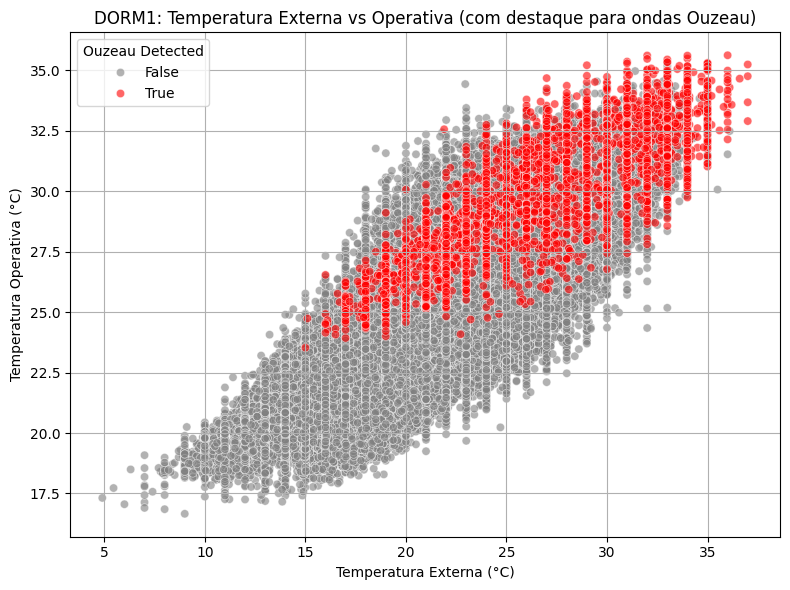

In [57]:
# Ordena o DataFrame colocando os eventos Ouzeau por último (para que fiquem por cima no plot)
df_plot = df_merged.copy()
df_plot = df_plot.sort_values(by='Ouzeau Detected')  # False (0) vem antes de True (1)

# Exemplo para DORM1
ambiente = 'DORM1'
col_temp_int = f'{ambiente}:Zone Operative Temperature [C](Hourly)'
col_temp_ext = 'Dry Bulb Temperature'  # ajuste conforme a coluna de temperatura externa

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='DORM1:Zone Operative Temperature [C](Hourly)',
    hue='Ouzeau Detected',
    palette={0: 'gray', 1: 'red'},
    alpha=0.6
)
plt.title(f'{ambiente}: Temperatura Externa vs Operativa (com destaque para ondas Ouzeau)')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Temperatura Operativa (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


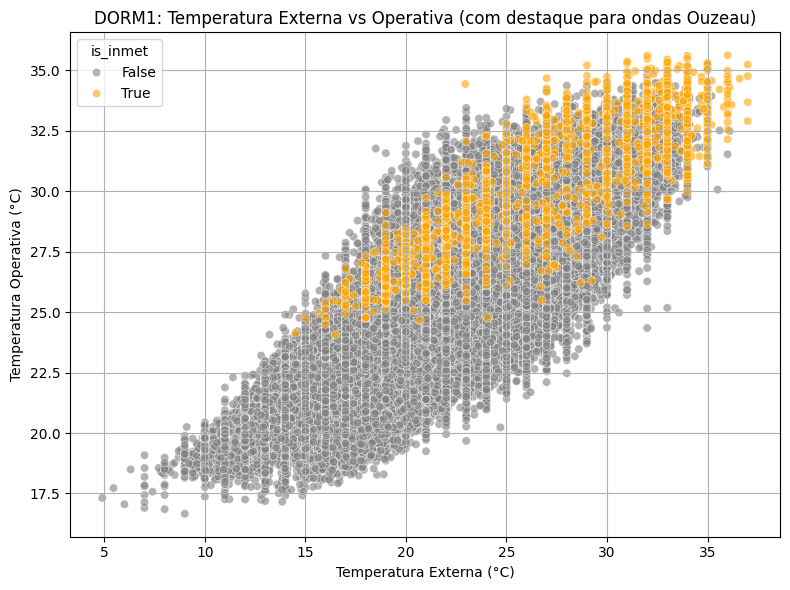

In [58]:
# Ordena o DataFrame colocando os eventos INMET por último (para que fiquem por cima no plot)
df_plot = df_merged.copy()
df_plot['is_inmet'] = df_plot['INMET Alert'].notna() & (df_plot['INMET Alert'] != '')
df_plot = df_plot.sort_values(by='is_inmet')


# Exemplo para DORM1
ambiente = 'DORM1'
col_temp_int = f'{ambiente}:Zone Operative Temperature [C](Hourly)'
col_temp_ext = 'Dry Bulb Temperature'  # ajuste conforme a coluna de temperatura externa

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='DORM1:Zone Operative Temperature [C](Hourly)',
    hue='is_inmet',
    palette={False: 'gray', True: 'orange'},
    alpha=0.6
)
plt.title(f'{ambiente}: Temperatura Externa vs Operativa (com destaque para ondas Ouzeau)')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Temperatura Operativa (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Criar coluna booleana para INMET
df_merged['is_inmet'] = df_merged['INMET Alert'].notna() & (df_merged['INMET Alert'] != '')

# Criar coluna categórica combinada
def classificar_evento(row):
    if row['is_inmet'] and row['Ouzeau Detected']:
        return 'Ambos'
    elif row['is_inmet']:
        return 'INMET'
    elif row['Ouzeau Detected']:
        return 'Ouzeau'
    else:
        return 'Nenhum'

df_merged['Tipo Evento Calor'] = df_merged.apply(classificar_evento, axis=1)


In [60]:
# Define ordem para que "Nenhum" venha antes e "Ambos" por último
ordem_plot = {'Nenhum': 0, 'Ouzeau': 1, 'INMET': 2, 'Ambos': 3}
df_plot = df_merged.copy()
df_plot['ordem'] = df_plot['Tipo Evento Calor'].map(ordem_plot)
df_plot = df_plot.sort_values(by='ordem')


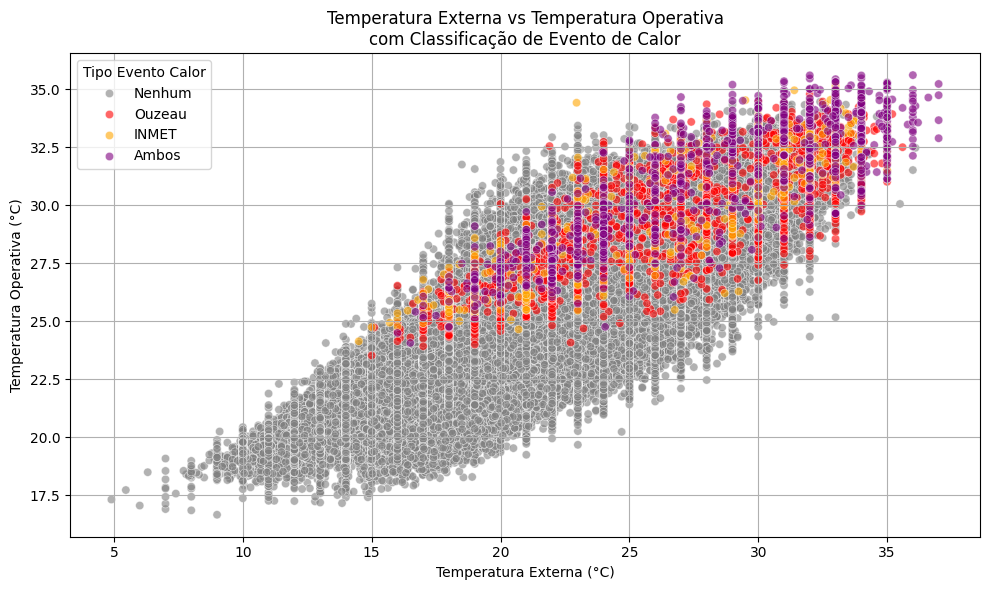

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='DORM1:Zone Operative Temperature [C](Hourly)',  # ou outro ambiente
    hue='Tipo Evento Calor',
    palette={
        'Nenhum': 'gray',
        'INMET': 'orange',
        'Ouzeau': 'red',
        'Ambos': 'purple'
    },
    alpha=0.6
)
plt.title('Temperatura Externa vs Temperatura Operativa\ncom Classificação de Evento de Calor')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Temperatura Operativa (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1298855041.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Evento de Calor')


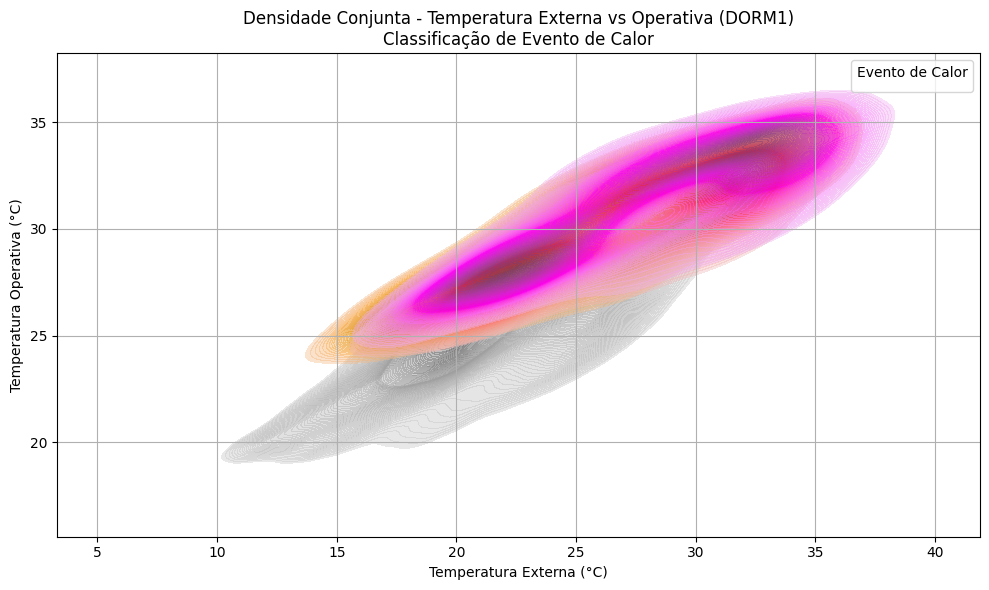

In [62]:
plt.figure(figsize=(10, 6))

cores = {
    'Nenhum': 'gray',
    'INMET': 'orange',
    'Ouzeau': 'red',
    'Ambos': 'purple'
}

for grupo, cor in cores.items():
    subset = df_plot[df_plot['Tipo Evento Calor'] == grupo]
    if not subset.empty:
        sns.kdeplot(
            data=subset,
            x='Dry Bulb Temperature',
            y='DORM1:Zone Operative Temperature [C](Hourly)',
            fill=True,
            thresh=0.05,
            levels=100,
            alpha=0.4,
            color=cor,
            label=grupo
        )

plt.title('Densidade Conjunta - Temperatura Externa vs Operativa (DORM1)\nClassificação de Evento de Calor')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Temperatura Operativa (°C)')
plt.legend(title='Evento de Calor')
plt.grid(True)
plt.tight_layout()
plt.show()


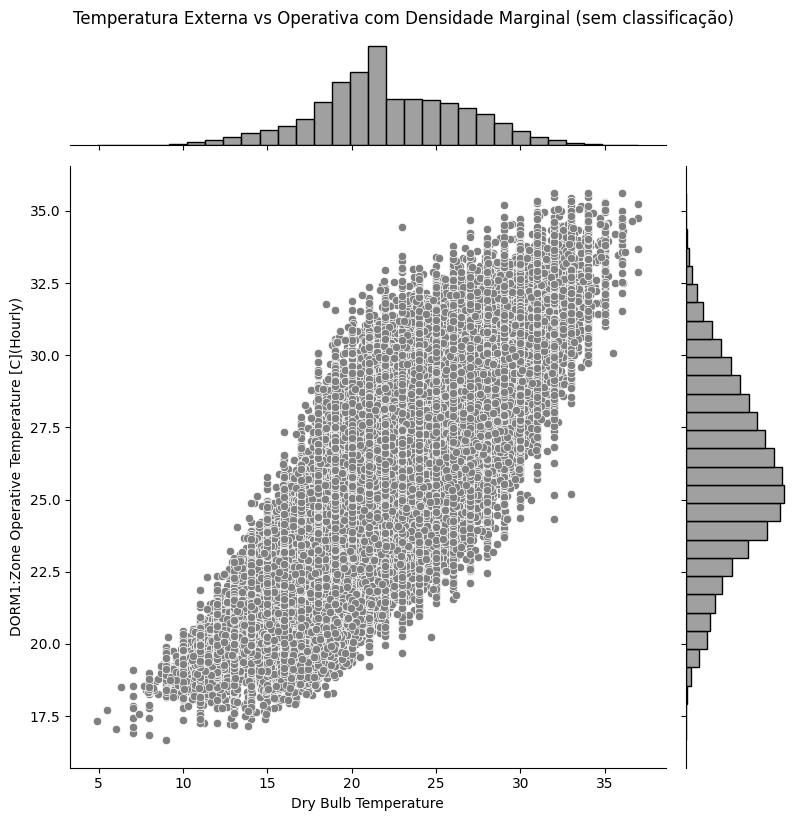

In [63]:
sns.jointplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='DORM1:Zone Operative Temperature [C](Hourly)',
    kind='scatter',
    marginal_kws=dict(bins=30, fill=True),
    height=8,
    color='gray'
)
plt.suptitle('Temperatura Externa vs Operativa com Densidade Marginal (sem classificação)', y=1.02)
plt.show()

In [64]:
def classificar_evento(row):
    inmet = pd.notna(row['INMET Alert']) and row['INMET Alert'] != ''
    ouzeau = row['Ouzeau Detected'] == 1
    if inmet and ouzeau:
        return 'Ambos'
    elif inmet:
        return 'INMET'
    elif ouzeau:
        return 'Ouzeau'
    else:
        return 'Nenhum'

df_plot['Tipo Evento Calor'] = df_plot.apply(classificar_evento, axis=1)

In [65]:
df_plot['Tipo Evento Calor'].value_counts()


Tipo Evento Calor
Nenhum    284273
Ouzeau      3266
Ambos        943
INMET        598
Name: count, dtype: int64

/tmp/ipython-input-1351275591.py:38: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[y], ax=ax_y, color=cor, fill=True, alpha=0.3, vertical=True)
/tmp/ipython-input-1351275591.py:38: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[y], ax=ax_y, color=cor, fill=True, alpha=0.3, vertical=True)
/tmp/ipython-input-1351275591.py:38: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[y], ax=ax_y, color=cor, fill=True, alpha=0.3, vertical=True)
/tmp/ipython-input-1351275591.py:38: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.

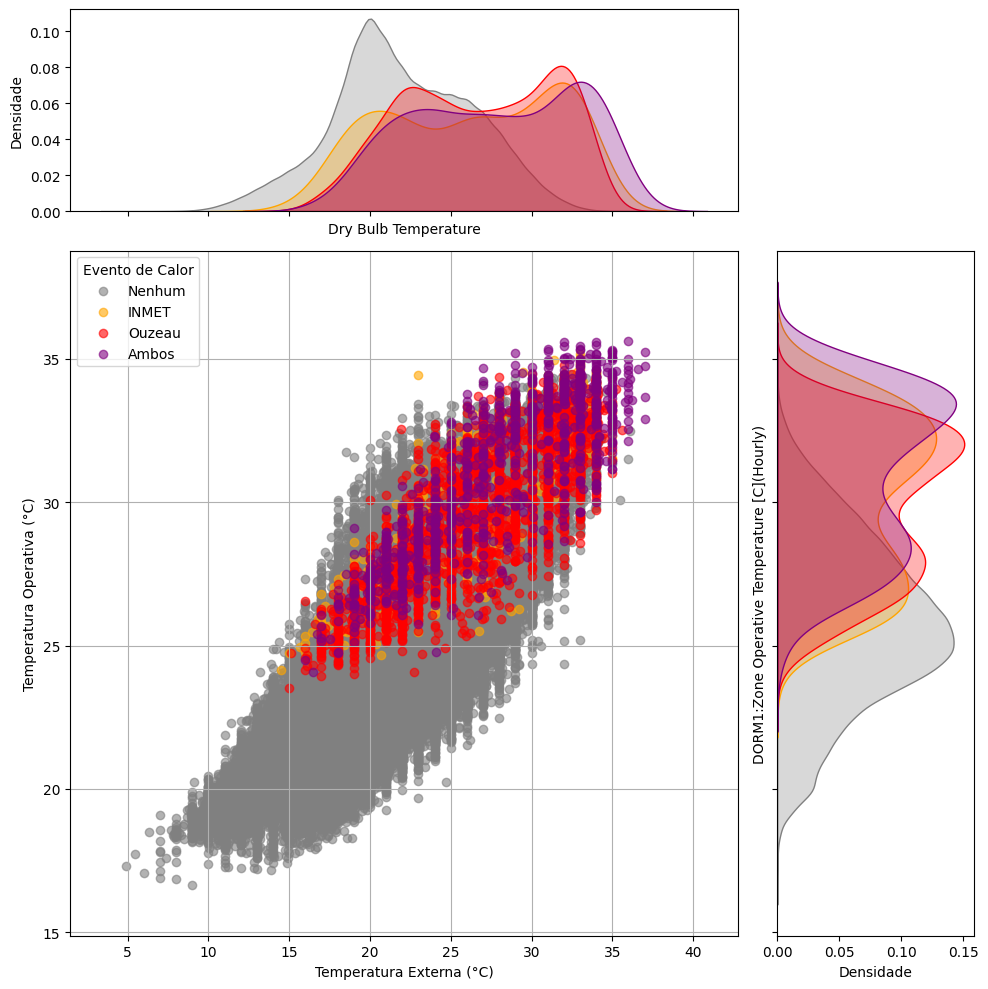

In [66]:
from matplotlib.gridspec import GridSpec

x = 'Dry Bulb Temperature'
y = 'DORM1:Zone Operative Temperature [C](Hourly)'

# Set up the grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 4)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_y = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Cores
cores = {
    'Nenhum': 'gray',
    'INMET': 'orange',
    'Ouzeau': 'red',
    'Ambos': 'purple'
}

# Scatterplot
for cat, cor in cores.items():
    subset = df_plot[df_plot['Tipo Evento Calor'] == cat]
    ax_main.scatter(subset[x], subset[y], label=cat, color=cor, alpha=0.6)

# Densidade marginal (X)
for cat, cor in cores.items():
    subset = df_plot[df_plot['Tipo Evento Calor'] == cat]
    if cat == 'Nenhum':
      sns.kdeplot(subset[x], ax=ax_x, color=cor, fill=True, alpha=0.3, bw_adjust=1.5)
    else:
        sns.kdeplot(subset[x], ax=ax_x, color=cor, fill=True, alpha=0.3)
    #sns.kdeplot(subset[x], ax=ax_x, color=cor, fill=True, alpha=0.3)

# Densidade marginal (Y)
for cat, cor in cores.items():
    subset = df_plot[df_plot['Tipo Evento Calor'] == cat]
    sns.kdeplot(subset[y], ax=ax_y, color=cor, fill=True, alpha=0.3, vertical=True)

# Ajustes visuais
ax_main.set_xlabel('Temperatura Externa (°C)')
ax_main.set_ylabel('Temperatura Operativa (°C)')
ax_main.grid(True)
ax_main.legend(title='Evento de Calor')

plt.setp(ax_x.get_xticklabels(), visible=False)
plt.setp(ax_y.get_yticklabels(), visible=False)
ax_x.set_ylabel('Densidade')
ax_y.set_xlabel('Densidade')

#plt.suptitle('Temperatura Externa vs Temperatura Operativa com Densidades Marginais', fontsize=14, y=0.95)
plt.tight_layout()
plt.show()

In [67]:
# Classificação combinada do evento de calor
df_merged_ac['is_inmet'] = df_merged_ac['INMET Alert'].notna() & (df_merged_ac['INMET Alert'] != '')

def classificar_evento(row):
    if row['is_inmet'] and row['Ouzeau Detected']:
        return 'Ambos'
    elif row['is_inmet']:
        return 'INMET'
    elif row['Ouzeau Detected']:
        return 'Ouzeau'
    else:
        return 'Nenhum'

df_merged_ac['Tipo Evento Calor'] = df_merged_ac.apply(classificar_evento, axis=1)

In [68]:
ambiente = 'SALA'  # ou 'SALA', 'DORM2', etc.

# Detectar o nome correto da coluna
col_cooling = [col for col in df_merged_ac.columns if ambiente in col and "Cooling Rate" in col][0]


In [69]:
col_cooling

'SALA IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](Hourly) '

In [70]:
ordem_plot = {'Nenhum': 0, 'Ouzeau': 1, 'INMET': 2, 'Ambos': 3}
df_plot = df_merged_ac.copy()
df_plot['ordem'] = df_plot['Tipo Evento Calor'].map(ordem_plot)
df_plot = df_plot.sort_values(by='ordem')


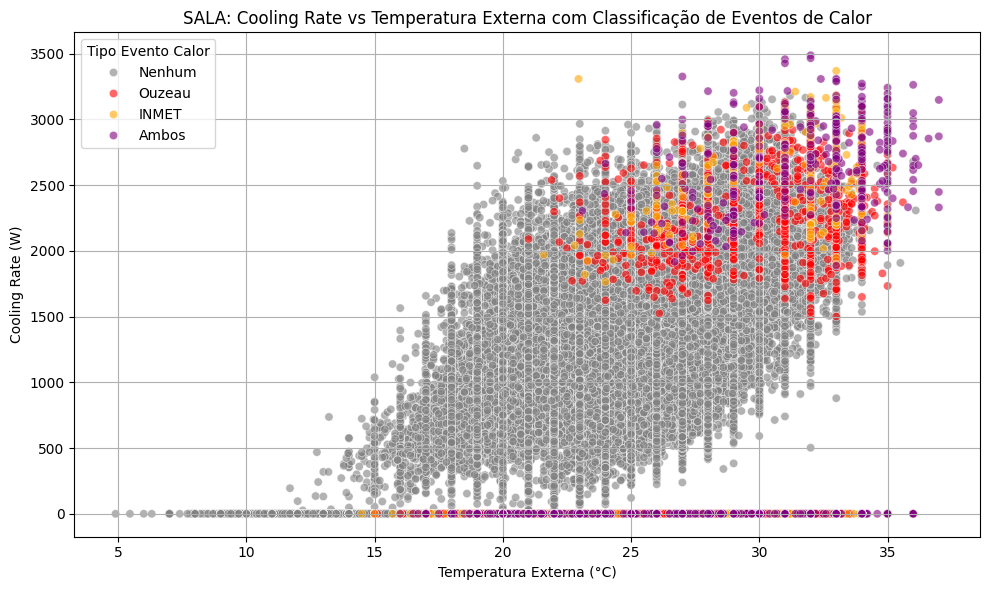

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',  # Temperatura externa
    y= col_cooling,             # Cooling Rate interno do ambiente
    hue='Tipo Evento Calor',
    palette={
        'Nenhum': 'gray',
        'INMET': 'orange',
        'Ouzeau': 'red',
        'Ambos': 'purple'
    },
    alpha=0.6
)
plt.title(f'{ambiente}: Cooling Rate vs Temperatura Externa com Classificação de Eventos de Calor')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Cooling Rate (W)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
# Passo 1: detectar colunas de Cooling Rate por ambiente
ambientes = ['SALA', 'DORM1', 'DORM2']
col_cooling = []

for ambiente in ambientes:
    match = next((col for col in df_merged_ac.columns if ambiente in col and "Cooling Rate" in col), None)
    if match:
        col_cooling.append(match)
    else:
        print(f"⚠️ Coluna de Cooling Rate não encontrada para {ambiente}")


In [73]:
# Passo 2: criar nova coluna com a soma
df_merged_ac['Cooling Rate Total (W)'] = df_merged_ac[col_cooling].sum(axis=1)

In [74]:
# Passo 3: ordenar DataFrame para que eventos fiquem por cima no gráfico
ordem_plot = {'Nenhum': 0, 'Ouzeau': 1, 'INMET': 2, 'Ambos': 3}
df_plot = df_merged_ac.copy()
df_plot['ordem'] = df_plot['Tipo Evento Calor'].map(ordem_plot)
df_plot = df_plot.sort_values(by='ordem')

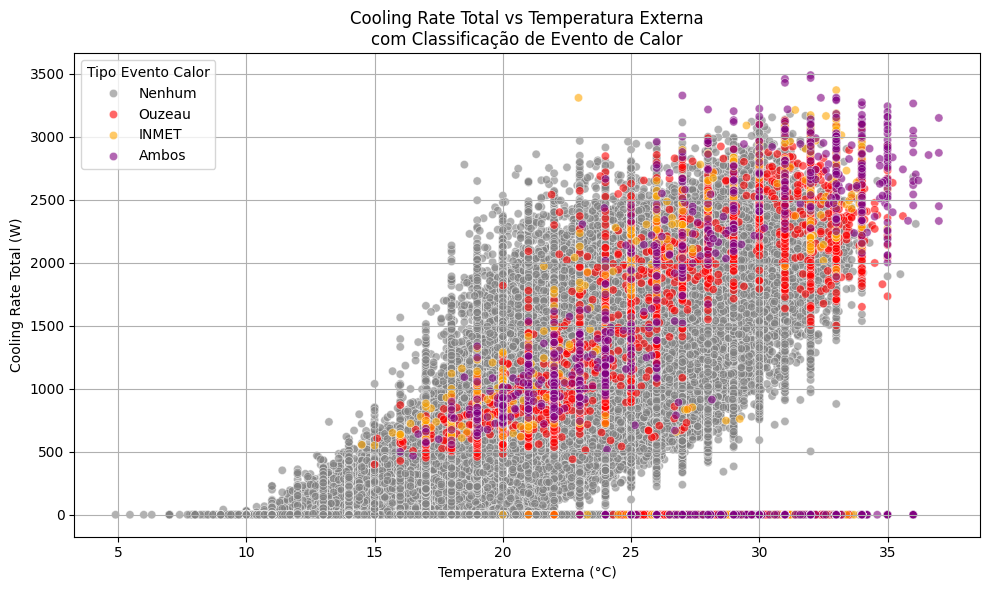

In [75]:
# Passo 4: plotar
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='Cooling Rate Total (W)',
    hue='Tipo Evento Calor',
    palette={
        'Nenhum': 'gray',
        'INMET': 'orange',
        'Ouzeau': 'red',
        'Ambos': 'purple'
    },
    alpha=0.6
)
plt.title('Cooling Rate Total vs Temperatura Externa\ncom Classificação de Evento de Calor')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Cooling Rate Total (W)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
# 1. Extrair hora do timestamp
df_merged_ac['hora'] = df_merged_ac['timeset'].dt.hour

In [77]:
# 2. Identificar colunas de Cooling Rate
cols_cooling = {}
for ambiente in ['SALA', 'DORM1', 'DORM2']:
    col = next((c for c in df_merged_ac.columns if ambiente in c and "Cooling Rate" in c), None)
    if col:
        cols_cooling[ambiente] = col
    else:
        print(f"⚠️ Coluna de Cooling Rate não encontrada para {ambiente}")

In [78]:
# 3. Inicializa a soma do Cooling Rate
df_merged_ac['Cooling Rate Total (W)'] = 0.0

In [79]:
# 4. Adiciona valores apenas em horários ocupados
mask_sala = df_merged_ac['hora'].between(15, 22)
df_merged_ac.loc[mask_sala, 'Cooling Rate Total (W)'] += df_merged_ac.loc[mask_sala, cols_cooling['SALA']]

mask_dorm = (df_merged_ac['hora'] >= 23) | (df_merged_ac['hora'] <= 8)
for dorm in ['DORM1', 'DORM2']:
    df_merged_ac.loc[mask_dorm, 'Cooling Rate Total (W)'] += df_merged_ac.loc[mask_dorm, cols_cooling[dorm]]

In [80]:
# 5. Filtrar apenas horários com ocupação (independente do valor ser zero ou não)
mask_ocupado = mask_sala | mask_dorm
df_plot = df_merged_ac[mask_ocupado].copy()

In [81]:
# 6. Classificação para plot (INMET/Ouzeau/Ambos/Nenhum)
ordem_plot = {'Nenhum': 0, 'Ouzeau': 1, 'INMET': 2, 'Ambos': 3}
df_plot['ordem'] = df_plot['Tipo Evento Calor'].map(ordem_plot)
df_plot = df_plot.sort_values(by='ordem')

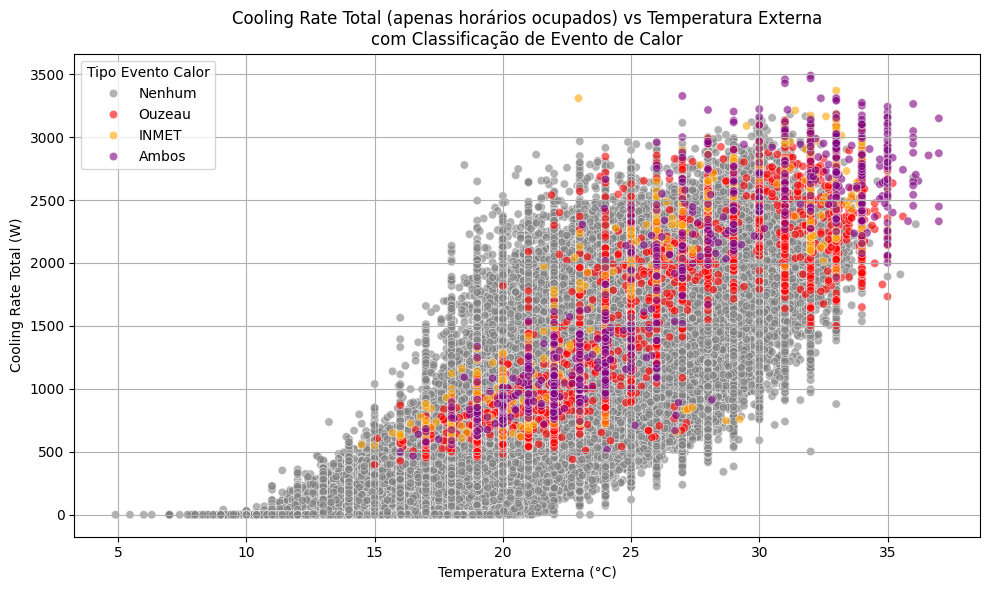

In [82]:
# 7. Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='Dry Bulb Temperature',
    y='Cooling Rate Total (W)',
    hue='Tipo Evento Calor',
    palette={'Nenhum': 'gray', 'INMET': 'orange', 'Ouzeau': 'red', 'Ambos': 'purple'},
    alpha=0.6
)
plt.title('Cooling Rate Total (apenas horários ocupados) vs Temperatura Externa\ncom Classificação de Evento de Calor')
plt.xlabel('Temperatura Externa (°C)')
plt.ylabel('Cooling Rate Total (W)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogramas

In [83]:
# Ambiente de interesse
ambiente = 'SALA'
col_temp = f'{ambiente}:Zone Operative Temperature [C](Hourly)'

# Máscaras para cada grupo
todos = df_merged[col_temp].notna()

so_inmet = df_merged['INMET Alert'].notna() & (df_merged['INMET Alert'] != '') & (df_merged['Ouzeau Detected'] != 1)
so_ouzeau = (df_merged['Ouzeau Detected'] == 1) & ~df_merged['INMET Alert'].notna()
ambos = (df_merged['INMET Alert'].notna()) & (df_merged['Ouzeau Detected'] == 1)

# Dados para cada grupo
temps_todos = df_merged.loc[todos, col_temp]
temps_inmet = df_merged.loc[so_inmet, col_temp]
temps_ouzeau = df_merged.loc[so_ouzeau, col_temp]
temps_ambos = df_merged.loc[ambos, col_temp]

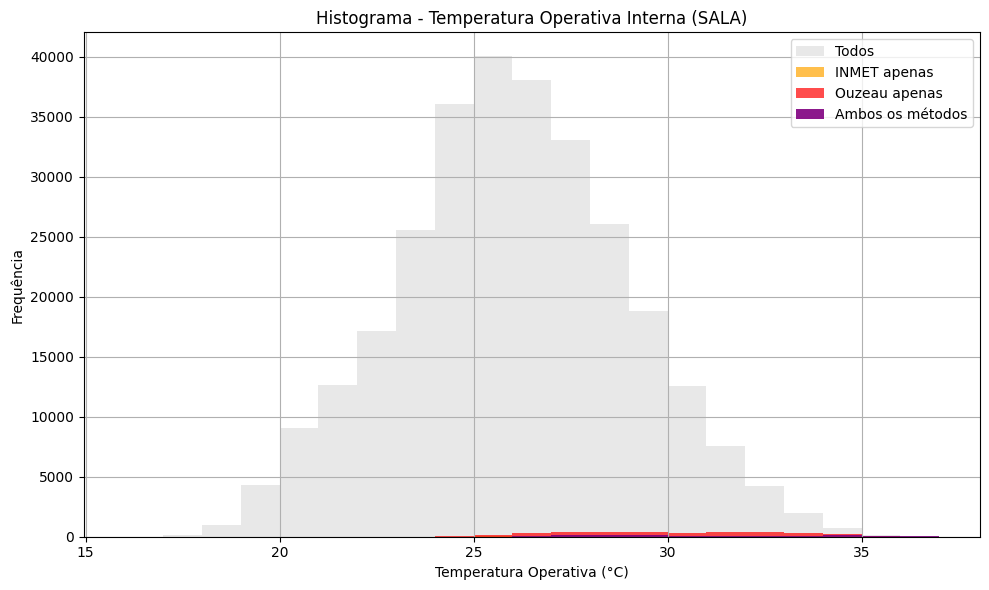

In [84]:
# Plot dos histogramas
plt.figure(figsize=(10, 6))
bins = range(int(df_merged[col_temp].min()), int(df_merged[col_temp].max()) + 1)

plt.hist(temps_todos, bins=bins, color='lightgray', label='Todos', alpha=0.5)
plt.hist(temps_inmet, bins=bins, color='orange', label='INMET apenas', alpha=0.7)
plt.hist(temps_ouzeau, bins=bins, color='red', label='Ouzeau apenas', alpha=0.7)
plt.hist(temps_ambos, bins=bins, color='purple', label='Ambos os métodos', alpha=0.9)

plt.title(f'Histograma - Temperatura Operativa Interna ({ambiente})')
plt.xlabel('Temperatura Operativa (°C)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-953118776.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


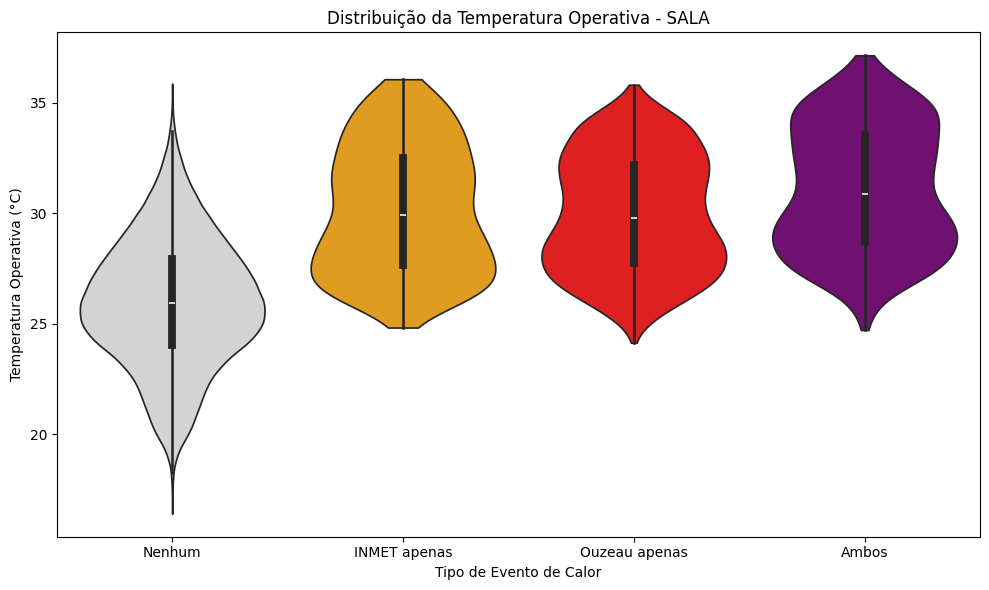

In [85]:
# Ambiente a analisar
ambiente = 'SALA'
col_temp = f'{ambiente}:Zone Operative Temperature [C](Hourly)'

# Criação de coluna categórica de evento
def classificar_evento(row):
    if pd.notna(row['INMET Alert']) and row['Ouzeau Detected'] == 1:
        return 'Ambos'
    elif pd.notna(row['INMET Alert']):
        return 'INMET apenas'
    elif row['Ouzeau Detected'] == 1:
        return 'Ouzeau apenas'
    else:
        return 'Nenhum'

df_merged['Evento Calor'] = df_merged.apply(classificar_evento, axis=1)

# Filtrar apenas registros com temperatura válida
df_violin = df_merged[[col_temp, 'Evento Calor']].dropna()

# Plot do gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_violin,
    x='Evento Calor',
    y=col_temp,
    palette={
        'Nenhum': 'lightgray',
        'INMET apenas': 'orange',
        'Ouzeau apenas': 'red',
        'Ambos': 'purple'
    },
    cut=0
)

plt.title(f'Distribuição da Temperatura Operativa - {ambiente}')
plt.xlabel('Tipo de Evento de Calor')
plt.ylabel('Temperatura Operativa (°C)')
#plt.grid(True)
plt.tight_layout()
plt.show()